In [1]:
import numpy as np
import svm_dual as svm
import datasets

from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from datasets import cmap
from datasets import ALPHA_CH

### BASELINE DATASET

In [2]:
def scatter_plot(X, y):
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap, alpha=ALPHA_CH)

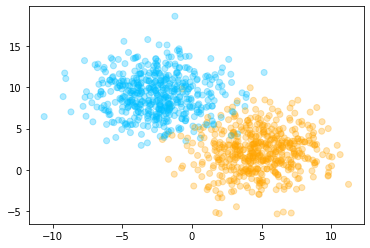

In [3]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=2.5, random_state=42)
y[y == 0] = -1

scatter_plot(X, y)

In [4]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [5]:
# FW
A, x_hat, loss, ttime = svm.fit_frank_wolfe(X_train, y_train, c=1e-3)

step	1:	476.39421209002205
step	2:	392.23859936584637
step	3:	299.31752886999533
step	4:	251.50527495506546
step	5:	206.19885071561922
step	6:	182.2059153067996
step	7:	159.81695944577544
step	8:	143.7590370577746
step	9:	127.08465359728501
step	10:	117.94757914222933
step	11:	107.42710513376224
step	12:	99.7559563916825
step	13:	92.46862396606947
step	14:	88.0020899995972
step	15:	81.48006117416683
step	16:	76.4224147050663
step	17:	73.11233732351324
step	18:	69.11637362399915
step	19:	65.52875057137962
step	20:	62.67642206349342
step	21:	59.49838387803423
step	22:	57.250620548192636
step	23:	54.56514840004648
step	24:	52.454786270094786
step	25:	51.05496809917455
step	26:	48.785270709103564
step	27:	47.032898834377235
step	28:	45.54955242863527
step	29:	43.86395594470894
step	30:	42.43748086762733
step	31:	41.24249206305439
step	32:	40.162269951388474
step	33:	39.110643190935576
step	34:	37.8336767789395
step	35:	36.752227215585854
step	36:	35.85993015603892
step	37:	34.879058993146


In [6]:
w, b, xi = svm.get_margin(A, x_hat)

y_pred = svm.predict(w, b, X_test)

print('w: ', w)
print('b: ', b)
print('Accuracy: ', accuracy_score(y_pred, y_test))
print('Time: ', ttime)

w:  [ 1.24574292 -0.48172891]
b:  0.3344707559261538
Accuracy:  0.984
Time:  0.3370943069458008


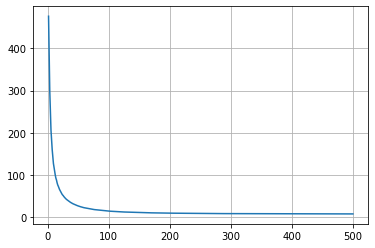

In [7]:
svm.plot_loss(loss)

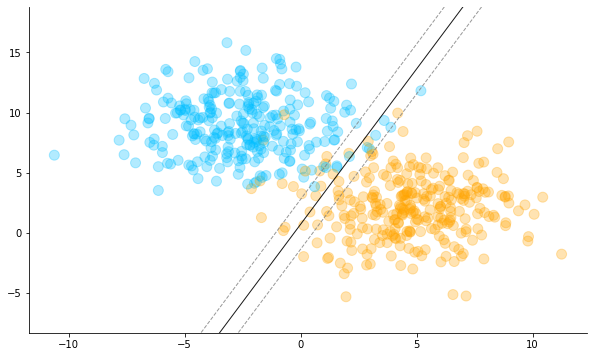

In [8]:
svm.plot_decision_boundary(w, b, X_train, y_train, X_test, y_test, plot_train=True, plot_test=False)

In [5]:
# PAIRWISE FW
A, x_hat, loss, ttime = svm.fit_pairwise_fw(X_train, y_train, c=1e-3)

step	1:	21.325560957471886
0.9612553355540583
0.03874466444594167
step	2:	19.132162887481023
0.9317085673098494
0.029546768244208883
step	3:	17.724177437104345
0.9067954340785768
0.02491313323127265
step	4:	16.80830353089383
0.8870489863375219
0.019746447741054805
step	5:	16.111022218049158
0.8690254123831778
0.018023573954344167
step	6:	15.453920967533628
0.8523116190443575
0.01671379333882027
step	7:	14.954577601435291
0.8372633078873838
0.015048311156973675
step	8:	14.522342584428968
0.8243559326222609
0.012907375265122818
step	9:	14.033570981976034
0.8098692809648119
0.014486651657448953
step	10:	13.656866336262242
0.7967934541617518
0.013075826803060069
step	11:	13.3639187673424
0.7851592354134579
0.011634218748293963
step	12:	13.109522268612745
0.7746750307983278
0.01048420461513013
step	13:	12.850256918081438
0.7640128109985402
0.010662219799787497
step	14:	12.620010419184569
0.7538298550124115
0.010182955986128749
step	15:	12.407427044233176
0.7437937285202769
0.010036126492134

In [6]:
w, b, xi = svm.get_margin(A, x_hat)

y_pred = svm.predict(w, b, X_test)

print('w: ', w)
print('b: ', b)
print('Accuracy: ', accuracy_score(y_pred, y_test))
print('Time: ', ttime)

w:  [ 0.92246648 -0.34237873]
b:  0.3271699850882612
Accuracy:  0.988
Time:  1.5558385848999023


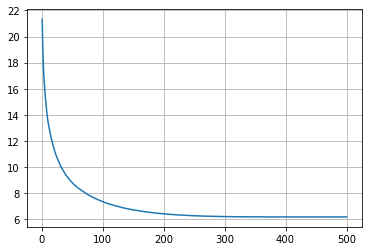

In [7]:
svm.plot_loss(loss)

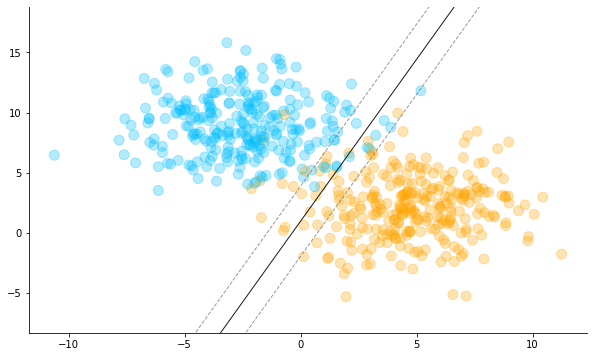

In [8]:
svm.plot_decision_boundary(w, b, X_train, y_train, X_test, y_test, plot_train=True, plot_test=False)

### BREAST CANCER DATASET

In [9]:
X, y = datasets.load_dataset(path='datasets/breast_cancer.txt')
X.shape

(683, 10)

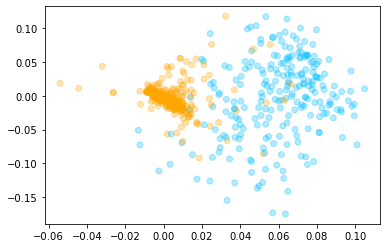

In [10]:
datasets.plot_2D(X, y)

In [11]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [16]:
# FW
c = svm.grid_search(svm.fit_frank_wolfe, X_train, y_train, X_val, y_val)
A, x_hat, loss, ttime = svm.fit_frank_wolfe(X_train, y_train, c=c)

step	1:	5.840462312965054
step	2:	4.898258152199326
step	3:	3.511771225951156
step	4:	3.0953015613392854
step	5:	2.2163755303597275
step	6:	1.9218069997492955
step	7:	1.7397060466152543
step	8:	1.7354560127841177
step	9:	1.3747019596446073
step	10:	1.3946738067224231
step	11:	1.2227062273942244
step	12:	1.1685263460094968
step	13:	1.0303494689298343
step	14:	0.9650013109761458
step	15:	0.9059023015196082
step	16:	0.8569168503163211
step	17:	0.8036989685928905
step	18:	0.7572333292387289
step	19:	0.7327844330786819
step	20:	0.701351851809775
step	21:	0.6972908422650638
step	22:	0.6773241873705159
step	23:	0.6663867765673224
step	24:	0.6345489264794011
step	25:	0.6170510549079053
step	26:	0.5869770423111347
step	27:	0.5718627170345302
step	28:	0.5489162946874071
step	29:	0.5581914809853856
step	30:	0.5359223954863545
step	31:	0.5196772406397876
step	32:	0.514220932309339
step	33:	0.5020480403322689
step	34:	0.5021129121659209
step	35:	0.49368276590041327
step	36:	0.48437491590061427
step

In [17]:
w, b, xi = svm.get_margin(A, x_hat)

y_pred = svm.predict(w, b, X_test)

print('w: ', w)
print('b: ', b)
print('Accuracy: ', accuracy_score(y_pred, y_test))
print('Time: ', ttime)

w:  [ 0.084894   -0.15285808 -0.06346088 -0.06356339 -0.05324606 -0.04199338
 -0.16443356 -0.08280306 -0.06488136 -0.00523276]
b:  -0.10342375507948251
Accuracy:  0.935672514619883
Time:  0.24670171737670898


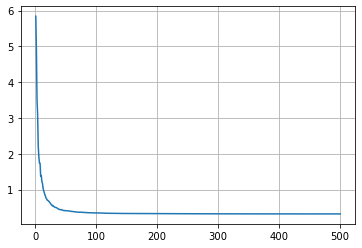

In [18]:
svm.plot_loss(loss)

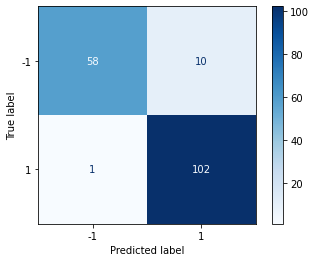

In [19]:
svm.plot_cmat(y_test, y_pred)

In [14]:
# PAIRWISE FW
# TODO: use the same C for plotting the loss of both algorithms
c = svm.grid_search(svm.fit_pairwise_fw, X_train, y_train, X_val, y_val)
A, x_hat, loss, ttime = svm.fit_pairwise_fw(X_train, y_train, c=c)

0.9949947258496641
0.005005274150335896
0.990203101426799
0.0047916244228650585
0.9860068397981082
0.004196261628690757
0.9819220726538535
0.004084767144254809
0.9779670198659852
0.003955052787868233
0.9740767603940838
0.003890259471901498
0.9704172104029335
0.0036595499911502584
0.9668306198905495
0.003586590512383918
0.9633735873354512
0.0034570325550983176
0.9599518860080481
0.00342170132740305
0.9565829087907672
0.003368977217280864
0.9532762416911954
0.0033066670995718426
0.9500164404132635
0.003259801277931955
0.9467952746473909
0.0032211657658726437
0.9436215575927354
0.0031737170546555084
0.940484454539801
0.0031371030529343262
0.9374090536886746
0.0030754008511264283
0.934436759575509
0.002972294113165611
0.931506497504466
0.0029302620710429193
0.9286414508058668
0.002865046698599223
0.9258421864326469
0.002799264373219922
0.9230744305932741
0.002767755839372839
0.9203615652015954
0.0027128653916787242
0.9176879888211614
0.0026735763804339495
0.9150443646517523
0.0026436241694

In [15]:
w, b, xi = svm.get_margin(A, x_hat)

y_pred = svm.predict(w, b, X_test)

print('w: ', w)
print('b: ', b)
print('Accuracy: ', accuracy_score(y_pred, y_test))
print('Time: ', ttime)

w:  [-0.00081326 -0.02087863 -0.00461549 -0.01243374 -0.0053849  -0.01113111
 -0.02685278 -0.00746507 -0.01318428  0.01444442]
b:  -0.020314935137959983
Accuracy:  0.9532163742690059
Time:  0.41571784019470215


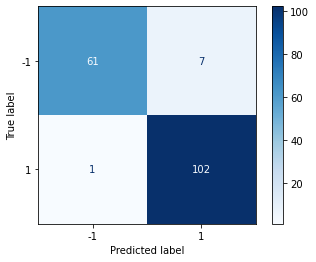

In [16]:
svm.plot_cmat(y_test, y_pred)

### AUSTRALIAN DATASET

In [17]:
X, y = datasets.load_dataset(path='datasets/australian.txt')
X.shape

(690, 12)

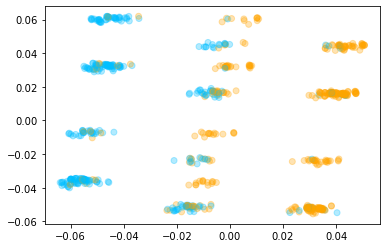

In [18]:
datasets.plot_2D(X, y)

In [19]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [24]:
# FW
c = svm.grid_search(svm.fit_frank_wolfe, X_train, y_train, X_val, y_val)
A, x_hat, loss, ttime = svm.fit_frank_wolfe(X_train, y_train, c=c)

step	1:	48.63959737762364
step	2:	36.648150542144705
step	3:	29.871730248363487
step	4:	24.28334174999456
step	5:	20.76119539896053
step	6:	17.90199671757871
step	7:	15.891594008146726
step	8:	14.118616995322048
step	9:	12.830486493725312
step	10:	11.666642681364818
step	11:	10.750159553737605
step	12:	9.949362401766741
step	13:	9.25830642643064
step	14:	8.651470909303187
step	15:	8.167074907894659
step	16:	7.661152527818623
step	17:	7.266566056038826
step	18:	6.875401698246467
step	19:	6.547101573561974
step	20:	6.224949630255055
step	21:	5.963157635777073
step	22:	5.693095129320792
step	23:	5.474585177632042
step	24:	5.251462417606211
step	25:	5.0675212850325195
step	26:	4.86149275670565
step	27:	4.703108887569171
step	28:	4.542652837719168
step	29:	4.389576078738651
step	30:	4.24902821259799
step	31:	4.120347386690708
step	32:	3.995616777194484
step	33:	3.8829198673195875
step	34:	3.7701481150606337
step	35:	3.665554156389405
step	36:	3.5739302503804953
step	37:	3.47332828497511
ste

In [25]:
w, b, xi = svm.get_margin(A, x_hat)

y_pred = svm.predict(w, b, X_test)

print('w: ', w)
print('b: ', b)
print('Accuracy: ', accuracy_score(y_pred, y_test))
print('Time: ', ttime)

w:  [ 0.00747552  0.00645041 -0.01740288 -0.06853646 -0.02777427 -0.01988027
 -0.19346713 -0.07793567 -0.02171041  0.01770126  0.02000202 -0.0078932 ]
b:  -0.008714999456392612
Accuracy:  0.8497109826589595
Time:  0.19655466079711914


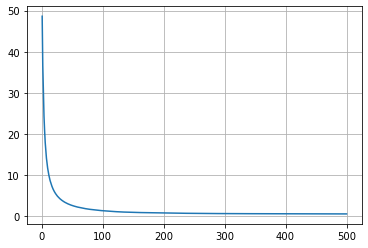

In [26]:
svm.plot_loss(loss)

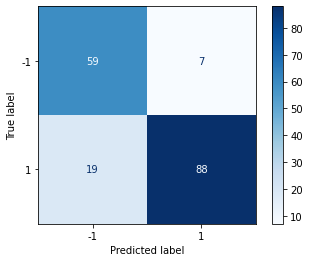

In [27]:
svm.plot_cmat(y_test, y_pred)

In [20]:
# PAIRWISE FW
c = svm.grid_search(svm.fit_pairwise_fw, X_train, y_train, X_val, y_val)
A, x_hat, loss, ttime = svm.fit_pairwise_fw(X_train, y_train, c=c)

0.9978929175955716
0.0021070824044283187
0.9958460817448455
0.002046835850726141
0.9938588057589174
0.0019872759859281205
0.9919096425105755
0.0019491632483418873
0.9900084819918631
0.0019011605187124164
0.9881564538113583
0.0018520281805047465
0.9863373415723712
0.0018191122389871633
0.9845764110324586
0.0017609305399126003
0.9828747447601193
0.0017016662723394096
0.9812120269798754
0.0016627177802438081
0.9796242165445642
0.0015878104353111984
0.9780631850979763
0.0015610314465879724
0.9765679216409813
0.0014952634569950708
0.9752807852242522
0.0012871364167290926
0.9740266334099037
0.001254151814348551
0.972808607023345
0.0012180263865586953
0.9716202516406086
0.0011883553827363776
0.9704405068456422
0.0011797447949663934
0.9692679791619949
0.0011725276836473072
0.9681040097713439
0.0011639693906509794
0.9669533012208792
0.0011507085504647385
0.9658609567492071
0.0010923444716720433
0.9648208225516055
0.0010401341976016194
0.9637818084729418
0.0010390140786637322
0.9627658571373563


In [21]:
w, b, xi = svm.get_margin(A, x_hat)

y_pred = svm.predict(w, b, X_test)

print('w: ', w)
print('b: ', b)
print('Accuracy: ', accuracy_score(y_pred, y_test))
print('Time: ', ttime)

w:  [ 3.90631612e-03 -6.24090651e-05 -2.71064675e-02 -8.95388584e-02
 -3.64182873e-02 -2.46737218e-02 -2.14378805e-01 -9.94611078e-02
 -2.36764790e-02  1.05922885e-02  1.97805804e-02 -5.88752033e-03]
b:  -0.007428816345167767
Accuracy:  0.8497109826589595
Time:  1.4524633884429932


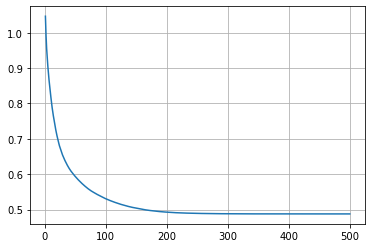

In [22]:
svm.plot_loss(loss)

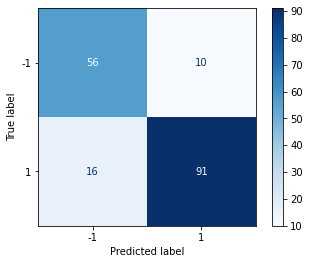

In [23]:
svm.plot_cmat(y_test, y_pred)